In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Game import *

Version:  0.2.23


In [3]:
from RobotSim373 import *

Version:  0.0.22


In [4]:
def initial_state(N=20):
    return N

def show_state(state):
    print("There are ",state,"sticks.")
    
def valid_moves(state,player):
    if state==1:
        return [1]
    elif state==2:
        return [1,2]
    else:
        return [1,2,3]
    
def update_state(state,player,move):
    # move = number of sticks to pick up
    new_state=state-move # remove the sticks
    return new_state

def win_status(state,player):
    if state==0:
        return 'lose'
    elif state==1:
        return 'win'
    else:
        return None
 

In [5]:
def human_move(state,player):
    print("Player ",player)
    move=int(input("How many sticks?"))
    return move

In [6]:
def random_move(state,player):
    possible_moves=valid_moves(state,player)
    move=random.choice(possible_moves)
    return move


In [7]:
def robot_skittles_move(state,player,S):
    if not state in S:
        move=random_move(state,player)
    else:
        move=weighted_choice(S[state])  
        
        
    return move



S=LoadTable('nim skittles table.json')



In [8]:
def build(robot):    
    
    up=Box(robot,2,2.5,width=1,height=.3,name='up')
    down=Box(robot,2,1.5,width=1,height=.3,name='down')
    center=Disk(robot,2,2,radius=0.3,name='center')
    left=Box(robot,1.3,2,width=1,height=.3,angle=90,name='left')
    right=Box(robot,2.7,2,width=1,height=.3,angle=-90,name='right')
    ram=Box(robot,3.2,2,width=.5,height=.5,name='ram',density=0)
    
    
    
    
    connect(up,down,'weld') 
    connect(center,down,'weld') 
    connect(up,center,'weld') 
    connect(center,left,'weld') 
    connect(left,right,'weld') 
    connect(right,ram,'weld') 

In [9]:
def act(t,robot):
    if t==0.0:
        robot.take_picture('board.jpg')
    pass

## Just drawing it to make sure it looks ok

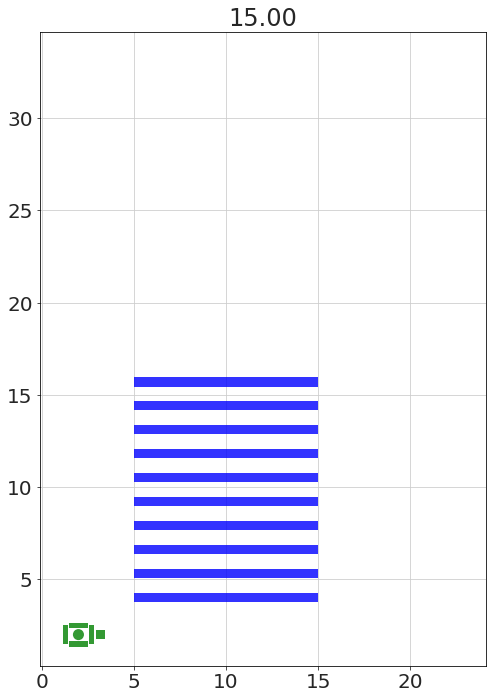

In [10]:
env=Environment(width=24,    # for consistency, manually set the environment size
        height=35,
linearDamping=20) 
robot=Robot(env)
build(robot)

N=initial_state(10)

for i in range(N):
    Box(env,x=10,y=4+1.3*i,width=10,height=0.5)

run_sim(env,act,
        total_time=15,  # seconds
        dt=1/60,
        dt_display=15,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    

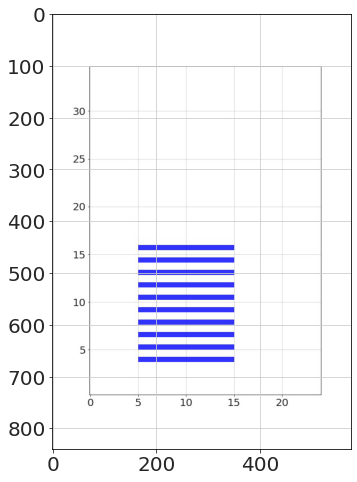

In [11]:
im=imread('board.jpg')
imshow(im)

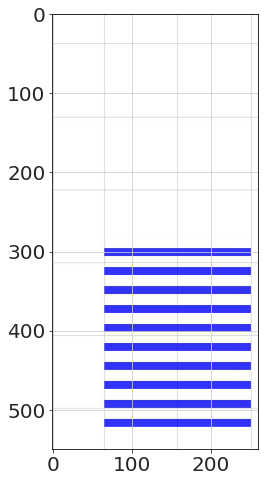

In [12]:
im=imread('board.jpg')

im2=im[150:700,100:360]
imshow(im2)  # trim out the axes

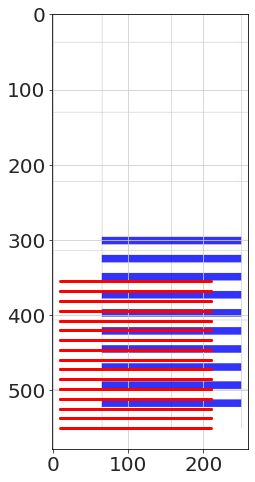

In [13]:
imshow(im2)  # trim out the axes

start_row=550
szr=13

for i in range(15):
    r1=start_row-(i+1)*szr
    r2=start_row-(i)*szr
    
    plot([10,210],[r1,r1],'r-')
    plot([10,210],[r2,r2],'r-')


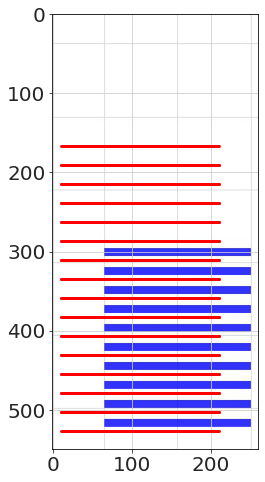

In [14]:
imshow(im2)  # trim out the axes

start_row=527   # played with these values until I got close enough - doesn't have to be perfect
szr=24

for i in range(15):
    r1=start_row-(i+1)*szr
    r2=start_row-(i)*szr
    
    plot([10,210],[r1,r1],'r-')
    plot([10,210],[r2,r2],'r-')


 
    

In [15]:
def get_square(im,i):
    im2=im[150:700,100:360]  # trim out the axes

    start_row=527   # played with these values until I got close enough - doesn't have to be perfect
    szr=24

    r1=start_row-(i+1)*szr
    r2=start_row-(i)*szr
    square=im2[r1:r2,:]
    
    return square


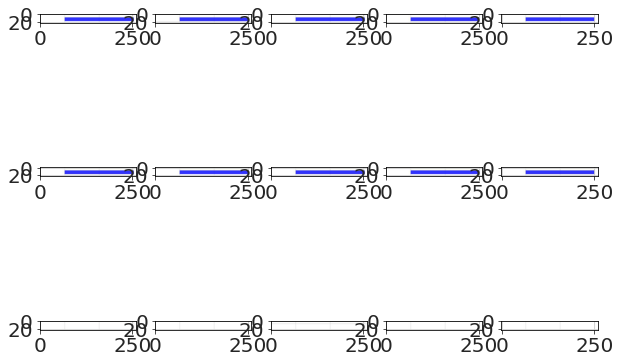

In [16]:
im=imread('board.jpg')
im2=im[150:700,100:360]
imshow(im2)
for i in range(15):
    square=get_square(im,i)
    subplot(3,5,i+1)
    imshow(square)
    imsave('square%d.jpg' % i,square)

## Now, manually put those square images into the proper folders in the file explorer...

## Train a classifier

In [17]:
from classy import *

Version:  0.0.28


In [18]:
images=image.load_images('Nim Images/')

[blank]: 5 files found
[piece]: 10 files found


In [19]:
data=image.images_to_vectors(images)

15 vectors of length 18720
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p18715', 'p18716', 'p18717', 'p18718', 'p18719'  (18720 features)
Target values given.
Target names: 'blank', 'piece'
Mean:  [254.93333333 254.93333333 254.93333333 ... 252.06666667 252.06666667
 252.06666667]
Median:  [255. 255. 255. ... 255. 255. 255.]
Stddev:  [ 0.24944383  0.24944383  0.24944383 ... 10.45285713 10.45285713
 10.45285713]


In [20]:
data.vectors=data.vectors
summary(data)

15 vectors of length 18720
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p18715', 'p18716', 'p18717', 'p18718', 'p18719'  (18720 features)
Target values given.
Target names: 'blank', 'piece'
Mean:  [254.93333333 254.93333333 254.93333333 ... 252.06666667 252.06666667
 252.06666667]
Median:  [255. 255. 255. ... 255. 255. 255.]
Stddev:  [ 0.24944383  0.24944383  0.24944383 ... 10.45285713 10.45285713
 10.45285713]


In [21]:
data_train,data_test=split(data)

Original vector shape:  (15, 18720)
Train vector shape:  (11, 18720)
Test vector shape:  (4, 18720)


In [22]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 100.0
On Test Set: 100.0


### Train on all the data

In [26]:
C.fit(data.vectors,data.targets)

### make a prediction

array([0], dtype=int32)

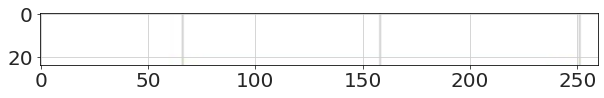

In [27]:
im=imread('board.jpg')
square=get_square(im,10)
imshow(square)
vector=atleast_2d(square.ravel())
C.predict(vector)

array([1], dtype=int32)

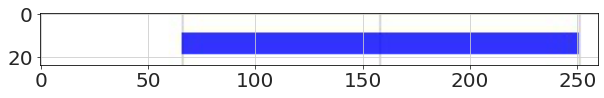

In [28]:
square=get_square(im,2)
imshow(square)
vector=atleast_2d(square.ravel())
C.predict(vector)

## Behaviors

In [29]:
def stop(t,robot):
    robot['up'].F=0
    robot['ram'].F=0
    return True

def move_up(t,robot):
    robot['up'].F=20
    robot['up'].F_angle=90
    return False

def move_down(t,robot):
    robot['up'].F=-40
    robot['up'].F_angle=90
    return False


def count(t,robot):
    d=robot['up'].read_distance()
    if d<10:  # a stick
        if robot.already_counted:
            return False
        else:
            robot.count+=1
            robot.already_counted=True
            return False
    else:
        robot.already_counted=False
        return False
    
    
def until_close_to_wall(t,robot):
    d=robot['left'].read_distance()
    if d<1.5:
        return True
    else:
        return False
    
def until_close_to_floor(t,robot):
    d=robot['right'].read_distance()
    if d<1.5:
        return True
    else:
        return False
    
def until_stick(t,robot):
    d=robot['ram'].read_distance()
    if d<10:
        return True
    else:
        return False

def wait(dt):
    
    def _wait(t,robot):
        if t<dt:
            return False
        else:
            return True
        
    return _wait
    
def ramming_speed(t,robot):
    stop(t,robot)
    robot['ram'].F=100
    
    if robot['ram'].x>13:
        return True
    
    return False

def ramming_return(t,robot):
    stop(t,robot)
    robot['ram'].F=-100
    if robot['ram'].x<3:
        robot.taken_count+=1
        return True
    return False
      
    
def get_move(t,robot):
    S=LoadTable('nim skittles table.json')    
    state=robot.count
    player=robot.player
    
    if state not in S:
        move=random_move(state,player)
    else:
        move=top_choice(S[state])
        
    robot.move=move
    robot.taken_count=0
    return True
    
def check_done(t,robot):
    if robot.taken_count==robot.move:
        return True  # go to next state
    else:
        return 'up_to_one'

def check_win(t,robot):
    state=robot.count
    move=robot.move
    player=robot.player
    state=update_state(state,player,move)
    if win_status(state,player)=='win':
        return 'win dance'
    if win_status(state,player)=='lose':
        return 'lose dance'
    
    # otherwise just do the next robot state
    return True
        
def win_dance(t,robot):
    robot.color='c'
    robot['center'].F=100
    robot['center'].F_angle=0
    if t>15:
        return True

def lose_dance(t,robot):
    robot.color='r'
    robot['center'].F=100
    robot['center'].F_angle=t*5
    if t>15:
        return True
        
def take_picture(t,robot):
    robot.take_picture('board.jpg')
    return True

def read_state(t,robot):
    im=imread('board.jpg')
    
    
    images=image.load_images('Nim Images/')
    data=image.images_to_vectors(images)

    C=NaiveBayes()
    C.fit(data.vectors,data.targets)
    
    values=[]
    squares=[]
    #board=Board(4,4)
    for i in range(21):
        square=get_square(im,i)
        vector=atleast_2d(square.ravel())
        value=C.predict(vector)[0]
        values.append(value)
        squares.append(square)
        #board[r,c]=value
        
    #robot.state=board
        
    print(values)
    
    robot.count=sum(values)
    robot.state=robot.count
    robot.values=values
    robot.squares=squares
    
    return True
    
def monitor(t,robot):
    robot.message=robot.controller.current_state+" "
    if robot.move:
        robot.message+="(state %s,move %d taken %d)" % (str(robot.state),robot.move,robot.taken_count)

In [30]:
read_state(0,robot)

[blank]: 5 files found
[piece]: 10 files found
15 vectors of length 18720
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p18715', 'p18716', 'p18717', 'p18718', 'p18719'  (18720 features)
Target values given.
Target names: 'blank', 'piece'
Mean:  [254.93333333 254.93333333 254.93333333 ... 252.06666667 252.06666667
 252.06666667]
Median:  [255. 255. 255. ... 255. 255. 255.]
Stddev:  [ 0.24944383  0.24944383  0.24944383 ... 10.45285713 10.45285713
 10.45285713]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


True

[blank]: 5 files found
[piece]: 10 files found
15 vectors of length 18720
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p18715', 'p18716', 'p18717', 'p18718', 'p18719'  (18720 features)
Target values given.
Target names: 'blank', 'piece'
Mean:  [254.93333333 254.93333333 254.93333333 ... 252.06666667 252.06666667
 252.06666667]
Median:  [255. 255. 255. ... 255. 255. 255.]
Stddev:  [ 0.24944383  0.24944383  0.24944383 ... 10.45285713 10.45285713
 10.45285713]


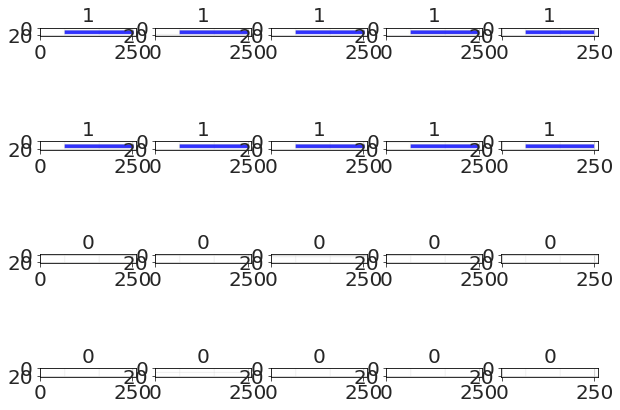

In [31]:
im=imread('board.jpg')
images=image.load_images('Nim Images/')
data=image.images_to_vectors(images)
C=NaiveBayes()
C.fit(data.vectors,data.targets)

values=[]
for i in range(20):
    square=get_square(im,i)
    vector=atleast_2d(square.ravel())
    value=C.predict(vector)[0]
    subplot(4,5,i+1)
    imshow(square)
    title(value)

In [32]:
take_sticks=StateMachine(
    {
     'up_to_one':([move_up,until_stick],'wait'),
     'wait':(wait(0.75),'ramming speed'),
     'ramming speed':(ramming_speed,'ramming return'),
     'ramming return':(ramming_return,'check if done'),
     'check if done':(check_done,'check if win'),
     'check if win':(check_win,'stop'),
     'win dance':(win_dance,'stop'),
     'lose dance':(lose_dance,'stop'),
     'stop':(stop,'_end_simulation'),   
    },
    first_state='up_to_one')

# this was the original counting behavior
# state_machine=StateMachine(
#     {
#      'count':([move_up,count,until_close_to_wall],'return'),
#      'return':([move_down,until_close_to_floor],'get move'),
#      'get move':(get_move,take_sticks),
#     },
#     first_state='count'
# )
    
# replace with image
state_machine=StateMachine(
    {
     'take picture':(take_picture,'read state'),
     'read state':(read_state,'get move'),
     'get move':(get_move,take_sticks),
    },
    first_state='take picture'
)



## Try a read state and a move

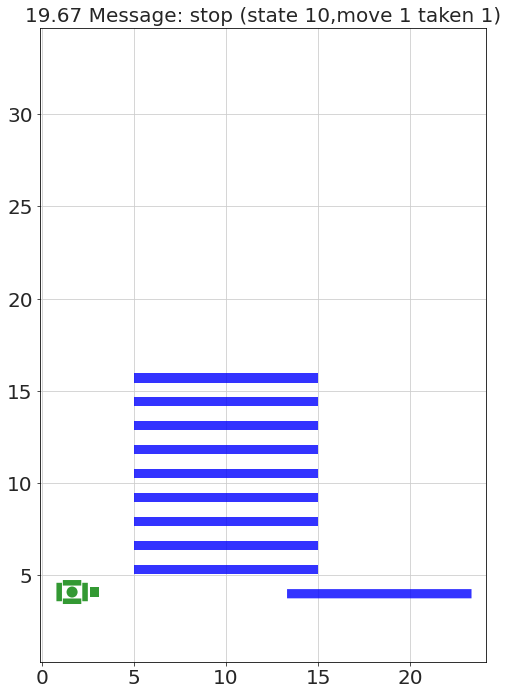

In [33]:
env=Environment(width=24,height=35,linearDamping=20) 
robot=Robot(env)
build(robot)

N=initial_state(10)

for i in range(N):
    Box(env,x=10,y=4+1.3*i,width=10,height=0.5)


robot.player=1
robot.taken_count=0
robot.count=0
robot.already_counted=False
robot.move=None

robot.controller=Controller(robot,state_machine)
robot.controller.monitor=monitor


run_sim(env,robot.controller,
        total_time=250,  # seconds
        dt=1/60,
        dt_display=1,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    


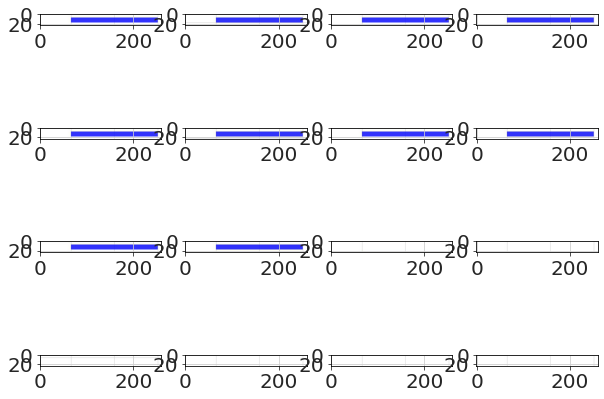

In [34]:
for i,s in enumerate(robot.squares[:16]):
    subplot(4,4,i+1)
    imshow(s)

## Try a human move

In [35]:
state=robot.state
move=robot.move
player=2
state=update_state(state,player,move)

In [36]:
show_state(state)
move=human_move(state,player)

if not move in valid_moves(state,player):
    raise ValueError("Bad move!")

There are  9 sticks.
Player  2


How many sticks? 2


manually move the pieces

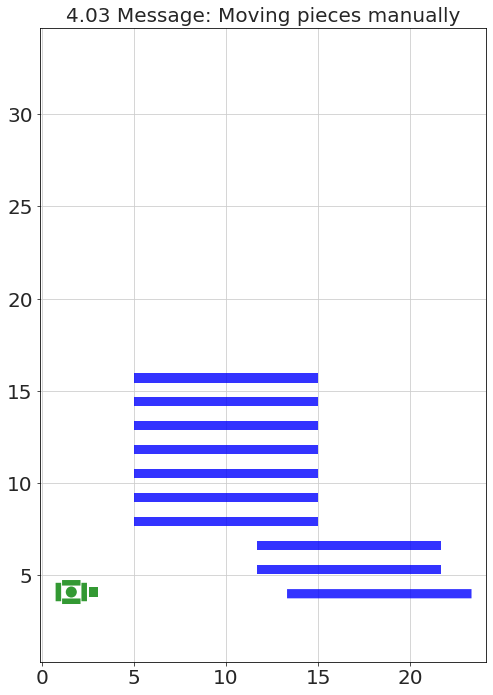

In [37]:
for i in range(move):
    stick=env.objects[N-state+i]
    stick.F=100
    
robot.message='Moving pieces manually'

run_sim(env,wait(4),
        total_time=6,  # seconds
        dt=1/60,
        dt_display=1,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )        

## Try a another robot move

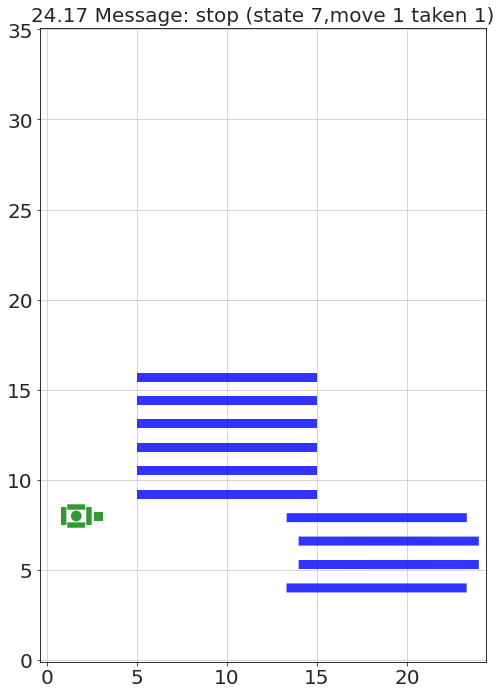

In [38]:
robot.count=0
robot.already_counted=False
robot.move=None

run_sim(env,robot.controller,
        total_time=200,  # seconds
        dt=1/60,
        dt_display=1,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    

## Putting it all together in a loop

In [39]:
env=Environment(width=24,height=35,linearDamping=20) 
robot=Robot(env)
build(robot)

state=N=initial_state(16)

for i in range(N):
    Box(env,x=10,y=4+1.3*i,width=7,height=0.5)



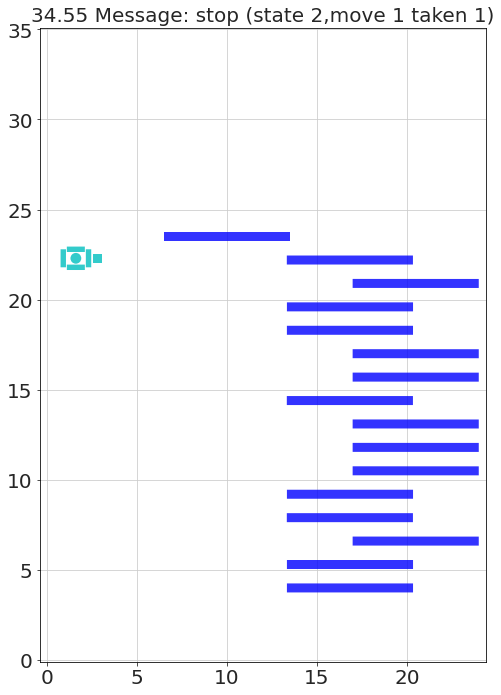

Player  1 wins.


In [40]:
while True:

    robot.player=1
    robot.taken_count=0
    robot.count=0
    robot.already_counted=False
    robot.move=None

    robot.controller=Controller(robot,state_machine)
    robot.controller.monitor=monitor


    run_sim(env,robot.controller,
            total_time=250,  # seconds
            dt=1/60,
            dt_display=1,  # make this larger for a faster display
            figure_width=8,
            plot_orientation=False,
           )
    
    
    move=robot.move
    player=robot.player
    state=update_state(state,player,move)    
    
    if win_status(state,player)=='win':
        print("Player ",player, "wins.")
        break
    elif win_status(state,player)=='lose':
        print("Player ",player, "loses.")
        break
        
    
    player=2
    show_state(state)
    move=human_move(state,player)

    if not move in valid_moves(state,player):
        raise ValueError("Bad move!")     

        
    for i in range(move):
        stick=env.objects[N-state+i]
        stick.F=100

    robot.message='Moving pieces manually'

    run_sim(env,wait(4),
            total_time=6,  # seconds
            dt=1/60,
            dt_display=1,  # make this larger for a faster display
            figure_width=8,
            plot_orientation=False,
           )    
    
    
    state=update_state(state,player,move)    
    
    if win_status(state,player)=='win':
        print("Player ",player, "wins.")
        break
    elif win_status(state,player)=='lose':
        print("Player ",player, "loses.")
        break
    